

**Dr Héctor Fernando Gómez**

Ingeniería en Datos e Inteligencia Organizacional

Universidad del Caribe

# Introducción



Las imágenes digitales representan uno de los medios más importantes para registrar información de diferentes fenómenos. Su procesamiento es muy importante en áreas tan diversas como:

1. Medicina.
2. Robótica.
3. Ciencias ambientales.
4. Astronomía.
5. Videojuegos.
6. Realidad aumentada y virtual.

Solo por citar algunas.





# Formación de imágenes digitales





Para que se forme una imagn es necesario contar con una **fuente de luz visible** (el sol o algún foco). La luz proveniente de la fuente se refleja en el objeto siguiendo múltiples direcciones. Algunos rayos de luz reflejada pasana través del foco de la lente de una cámara y se proyecta en el **plano de formación de la imagen**

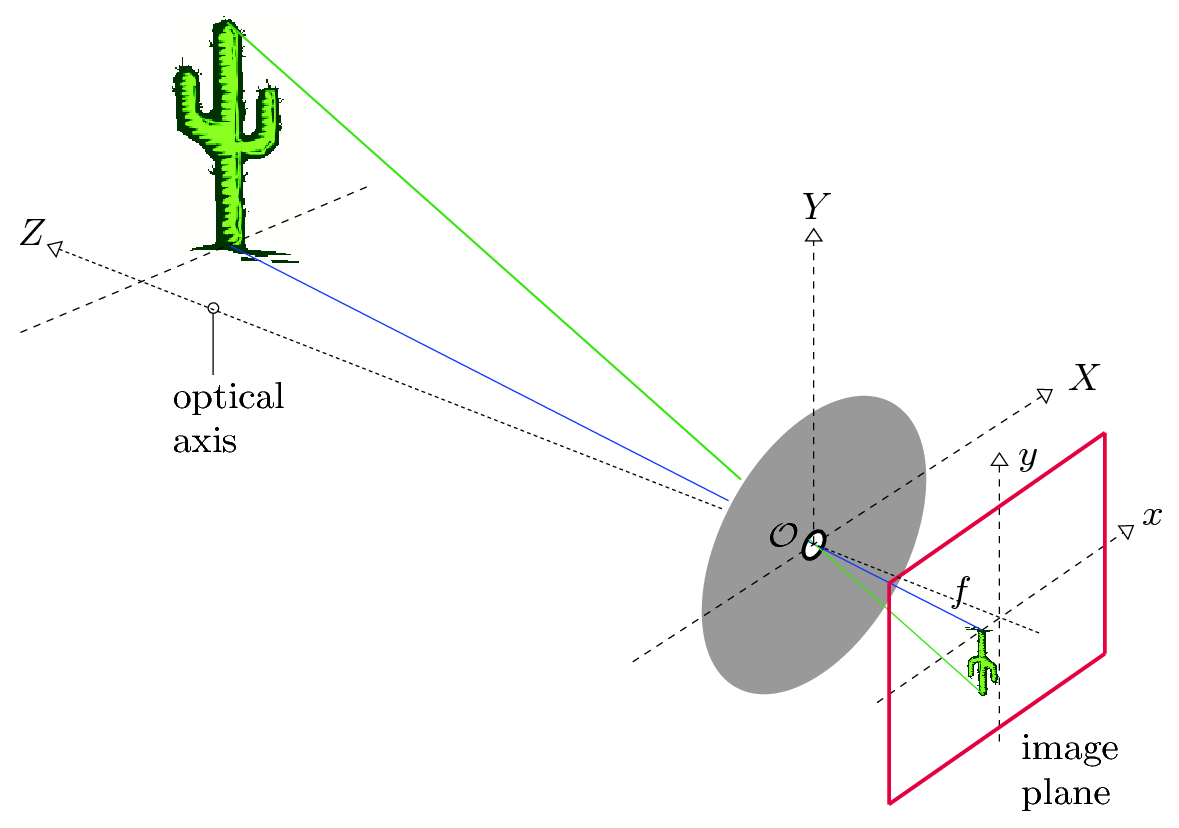


Fuente de las imágenes de esta presentación: https://imagingbook.com/

El plano de formación de una **imagen digital** está compuesto por una arreglo rectangular de sensores que miden la intensidad de la luz que reciben y cuyos valores se registran en la memoria de la cámara.

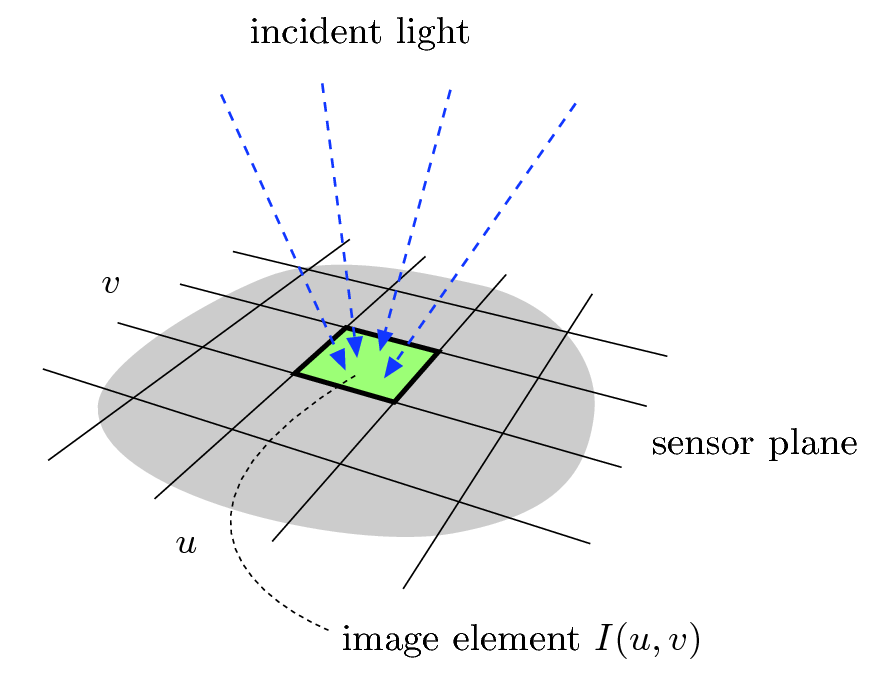

Los valores numéricos sensados se registran una matriz rectangular de números

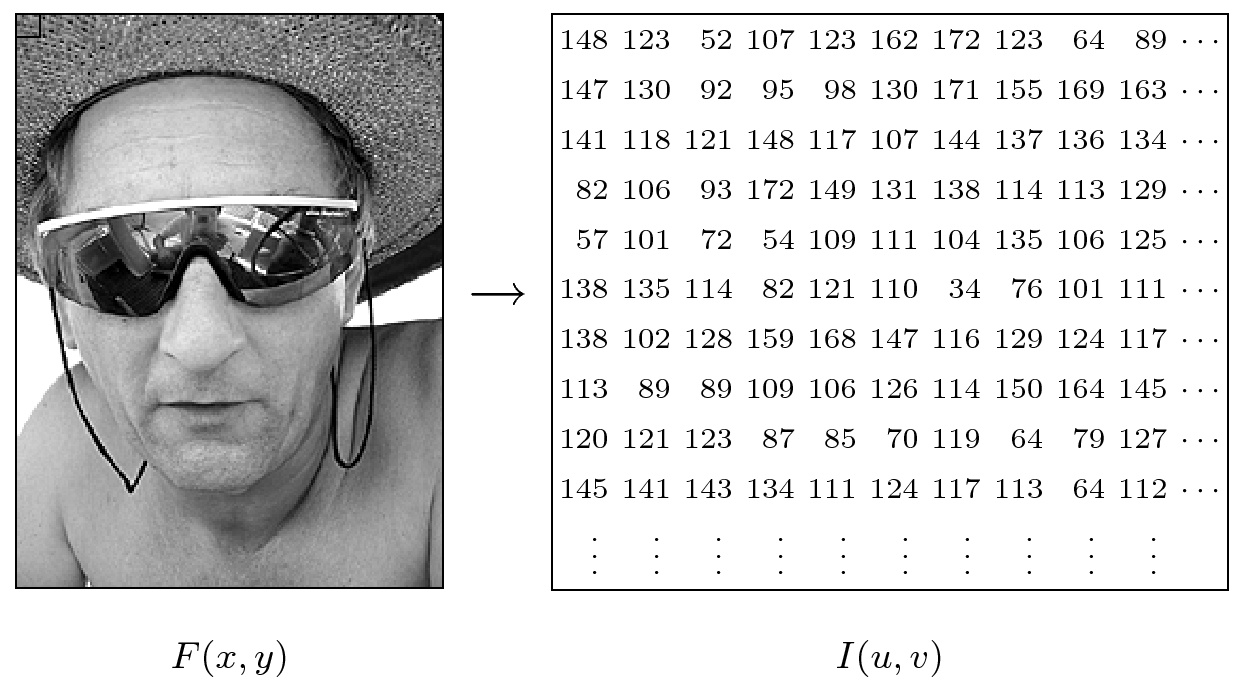

# Pixeles

En una imagen, a cada número de la matriz se le conoce como **pixel**. Cada pixel tiene asociado un color. En imágenes en escala de grises, los pixeles con números cercanos a cero se representan con color negro, mientras que los valores más altos se representan con blanco

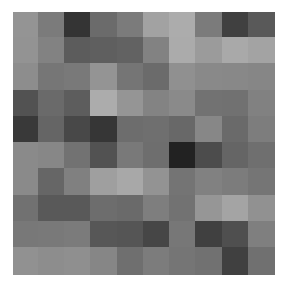

# Exploración de imágenes

En las siguientes celdas utilizaremos un lenguaje de programación llamado *Python* para explorar diferentes imágenes apoyándonos también en una librería denominada OpenCV.

* https://www.python.org/
* https://opencv.org/




In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Lectura de imágenes

Con OpenCV podemos leer imágenes de guardadas en diferentes formatos

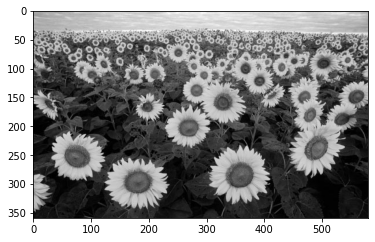

In [13]:
im = cv2.imread("Sunflowers.jpg", 0)

plt.imshow(im, cmap="gray")
#plt.axis("off")
plt.show()

La imagen que acabamos de leer tiene 359 filas y 580 columnas.

In [4]:
im.shape

(359, 580)

El total de pixeles es de:

In [5]:
im.shape[0]*im.shape[1]

208220

Podemos revisar los valores numéricos guardados en los pixeles, pero son muchos y se van a extender a lo largo de este documento:

In [ ]:
im

array([[157, 157, 156, ..., 175, 174, 173],
       [166, 166, 165, ..., 167, 167, 168],
       [172, 172, 172, ..., 160, 160, 160],
       ...,
       [ 20,  20,  14, ...,  13,  14,  13],
       [ 20,  20,  13, ...,  11,  10,  10],
       [ 21,  19,  11, ...,  10,  10,  15]], dtype=uint8)

Revisamos algunas secciones de la imagen:

In [6]:
im[0:5, 0:5]

array([[157, 157, 156, 154, 153],
       [166, 166, 165, 164, 162],
       [172, 172, 172, 171, 170],
       [168, 169, 170, 171, 170],
       [162, 164, 165, 167, 167]], dtype=uint8)

<font color="red"> Actividad </font>

Escribe el código necesario para visualizar los valores de los pixeles ubicados de las filas 100 a la 110 y de la columna 70 a la 75

## Modificación de la intensidad

También podemos modificar el valor de intensidad de los pixeles de la imagen.

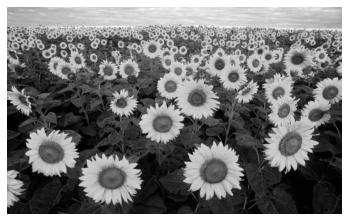

In [14]:
# modificamos la intensidad del primer pixel 
im[0,0] = 0

# el efecto es imperceptible
plt.imshow(im, cmap="gray")
plt.axis("off")
plt.show()

Podemos realizar transformaciones más drásticas:

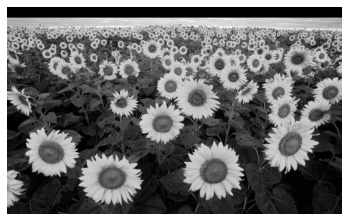

In [15]:
im[0:20,:] = 0

plt.imshow(im, cmap="gray")
plt.axis("off")
plt.show()

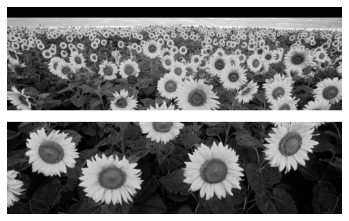

In [16]:
im[180:200,:] = 255

plt.imshow(im, cmap="gray")
plt.axis("off")
plt.show()

<font color="red">Actividad</font>

En la siguiente celda, escribe el código necesario para que se vuelva a leer la imagen. Después de leerla, dibuja un cuadrado blanco con 40 pixeles de lado ubicado en el centro de la imagen. Visualiza la imagen resultante.

In [18]:
# recuerda que la imagen tiene 359 renglones y 580 columnas

# Estadísticas básicas

Podemos explorar algunas estadísticas de la imagen (usando la librería numpy):

In [19]:
im = cv2.imread("Sunflowers.jpg", 0)

In [20]:
# mínimo 
np.min(im)

0

In [21]:
# máximo 
np.max(im)

255

In [22]:
# promedio
np.mean(im)

105.25847180866391

In [23]:
# desviación estándar
np.std(im)

73.50535361727853

# Histograma de frecuencias

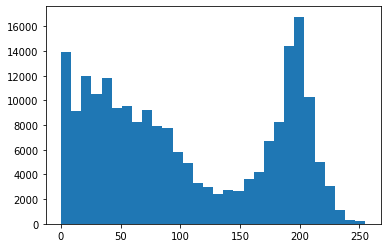

In [24]:
plt.hist(im.ravel(), bins=30)
plt.show()

# Transformaciones puntuales

Podemos transformar los valores de intensidad de los pixeles de una imagen mediante alguna función.

Por ejemplo:



## Negativo

In [25]:
im_neg = -im

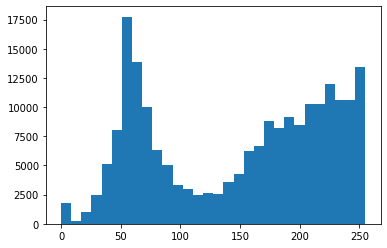

In [26]:
plt.hist(im_neg.ravel(), bins=30)
plt.show()

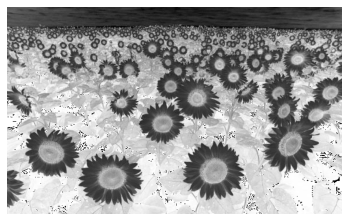

In [27]:
plt.imshow(im_neg, cmap="gray")
plt.axis("off")
plt.show()

## Potencias

In [28]:
#raíz cuadrada
im_pot = np.sqrt(im)

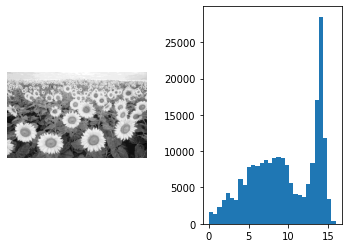

In [29]:
plt.subplot(121)
plt.imshow(np.byte(im_pot), cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.hist(im_pot.ravel(), bins=30)
plt.subplots_adjust(wspace=0.4) 
plt.show()

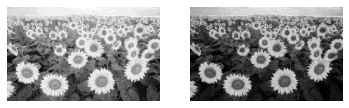

In [30]:
plt.subplot(121)
plt.imshow(np.byte(im_pot), cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(im, cmap="gray")
plt.axis("off")
plt.show()

In [33]:
# a la 3/2
im_pot = np.power(im,1.5)
im_pot = (im_pot-np.min(im_pot))/(np.max(im_pot)-np.min(im_pot))*255

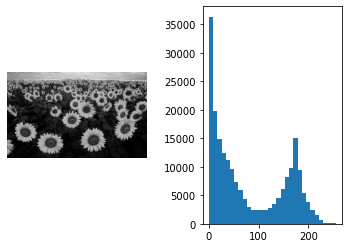

In [34]:
plt.subplot(121)
plt.imshow(im_pot, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.hist(im_pot.ravel(), bins=30)
plt.subplots_adjust(wspace=0.4) 
plt.show()

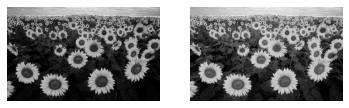

In [35]:
plt.subplot(121)
plt.imshow(im_pot, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(im, cmap="gray")
plt.axis("off")
plt.show()

<font color="red">Actividad</font>

En la siguiente celda, escribe el código necesario para cargar la imagen *croatia-02.jpg* y construye el histograma de frecuencias de las intensidades de sus pixeles. 

# Transformaciones geométricas

Las transformaciones geométricas modifican la posición de un pixel. Algunos ejemplos:

* Traslación.
* Rotación.
* Escalamiento.
* Transformaciones proyectivas.

Algunos ejemplos se muestran en las siguientes celdas.

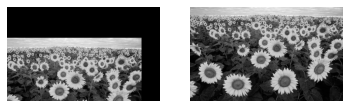

In [ ]:
# traslación

M = np.float32([
	[1, 0, -70],
	[0, 1, 120]
])

im_trasl = cv2.warpAffine(im, M, (im.shape[1], im.shape[0]))

plt.subplot(121)
plt.imshow(im_trasl, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(im, cmap="gray")
plt.axis("off")
plt.show()

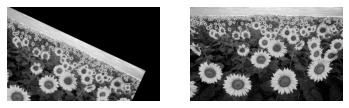

In [ ]:
# rotación

ang = 25*np.pi/180.0

M = np.float32([
	[np.cos(ang), -np.sin(ang), 0],
	[np.sin(ang), np.cos(ang), 0]
])

im_trasl = cv2.warpAffine(im, M, (im.shape[1], im.shape[0]))

plt.subplot(121)
plt.imshow(im_trasl, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(im, cmap="gray")
plt.axis("off")
plt.show()

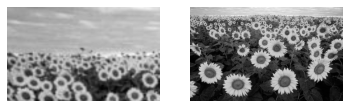

In [ ]:
# escalamiento

e = 5

M = np.float32([
	[e, 0, 0],
	[0, e, 0]
])

im_trasl = cv2.warpAffine(im, M, (im.shape[1], im.shape[0]))

plt.subplot(121)
plt.imshow(im_trasl, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(im, cmap="gray")
plt.axis("off")
plt.show()

<font color="red">Actividad</font>

En la siguiente celda escribe el código necesario para obtener una traslación de la imagen de manera que la esquina superior izquierda quede en el centro.